## Montando o drive do Google.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image
from google.colab.patches import cv2_imshow # para mostrar as imagens do Google Colabimport cv2 # OpenCV

### <font color="green">Imagem Original</font>

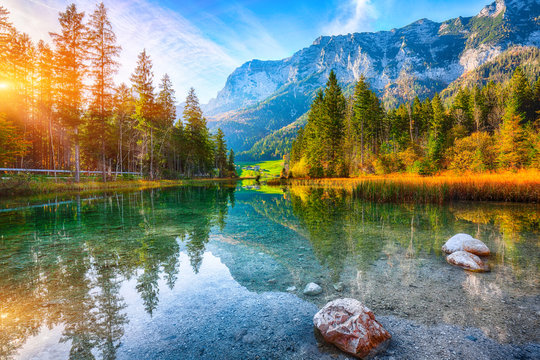

In [3]:
img_bgr = cv2.imread("/content/drive/MyDrive/360_F_227755821_7n8oQWuxQ9Nf4nACKFrBLCETOzwC1kYy.jpg",cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display 18x18 pixel image.
Image(filename='/content/drive/MyDrive/360_F_227755821_7n8oQWuxQ9Nf4nACKFrBLCETOzwC1kYy.jpg')
cv2_imshow(img_bgr)

##CALCULAR O HISTOGRAMA PARA CADA COR RGB

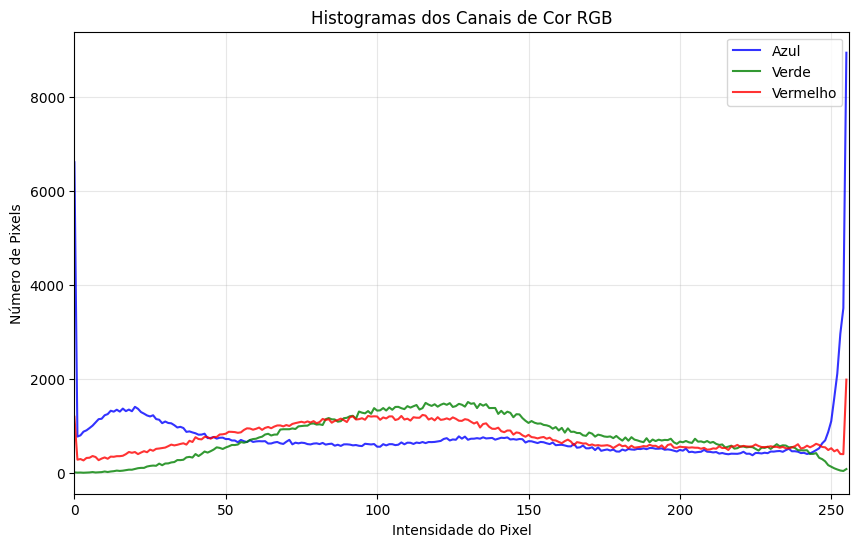

In [4]:
# Calculate the histogram for each color channel
plt.figure(figsize=(10, 6))

color = ('b', 'g', 'r')
canal_names = ['Azul', 'Verde', 'Vermelho']

for i, (col, name) in enumerate(zip(color, canal_names)):
    histogram = cv2.calcHist([img_bgr], [i], None, [256], [0, 256])
    plt.plot(histogram, color=col, label=name, alpha=0.8)

plt.xlim([0, 256])
plt.title('Histogramas dos Canais de Cor RGB')
plt.xlabel('Intensidade do Pixel')
plt.ylabel('Número de Pixels')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

##HISTOGRAMA SEPARADO PARA CADA COR RGB

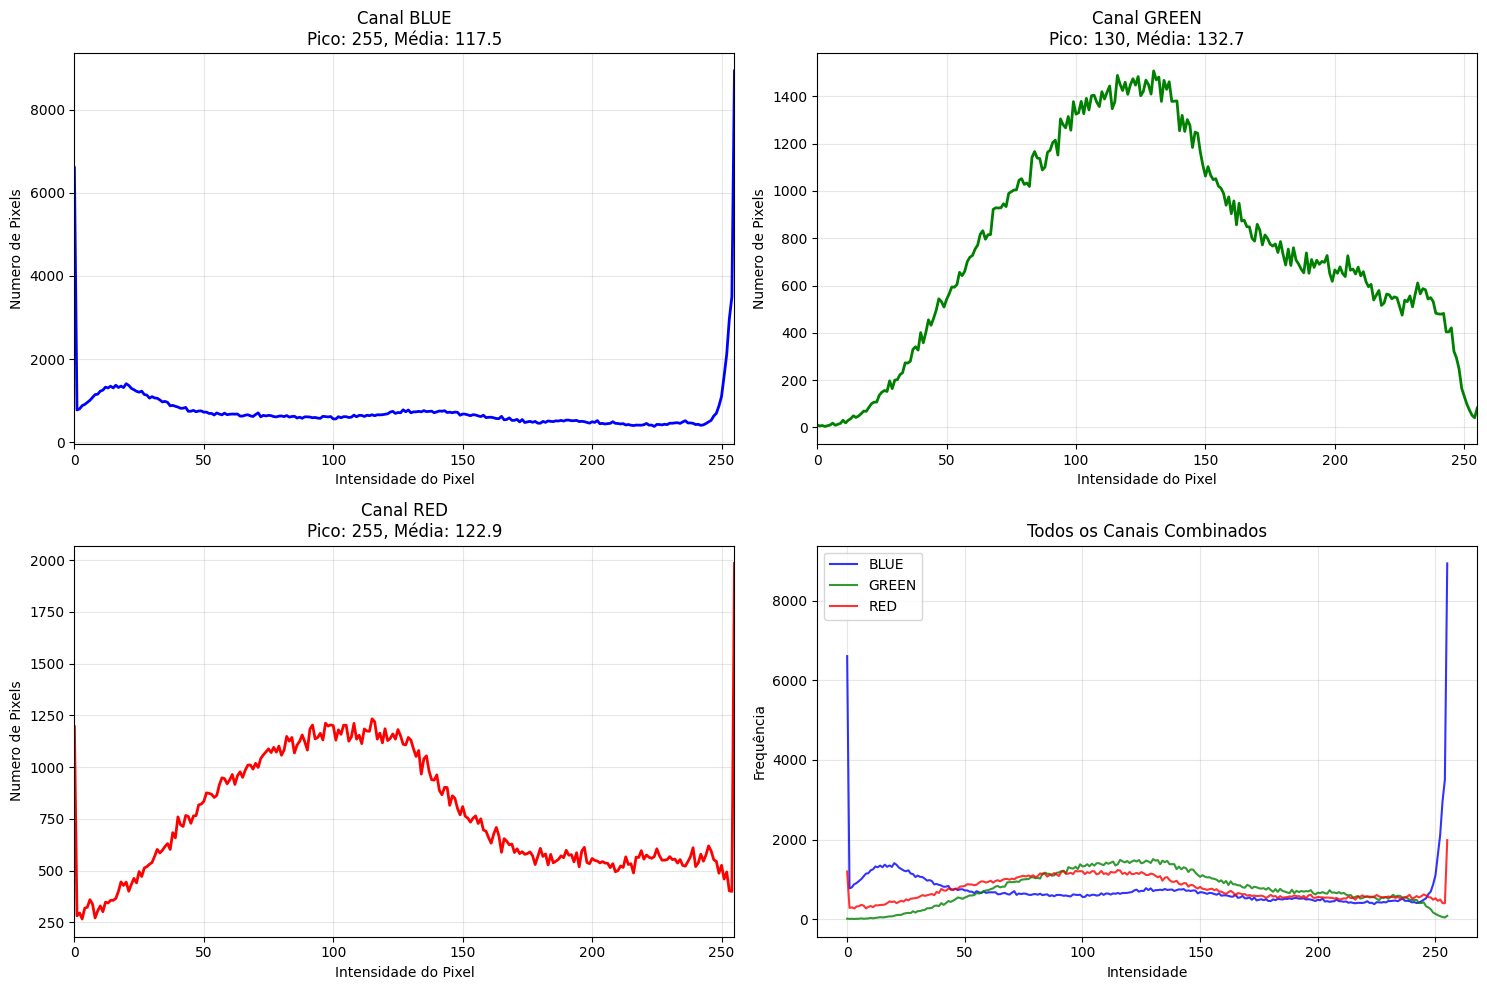

In [5]:
plt.figure(figsize=(15, 10))

color = ('b', 'g', 'r')
canal_names = ['BLUE', 'GREEN', 'RED']

for i, (col, name) in enumerate(zip(color, canal_names)):
    # Calcular histograma
    histogram = cv2.calcHist([img_bgr], [i], None, [256], [0, 256])

    # Calcular estatísticas
    total_pixels = np.sum(histogram)
    max_intensity = np.argmax(histogram)
    mean_intensity = np.sum(np.arange(256) * histogram.flatten()) / total_pixels

    # Plotar
    plt.subplot(2, 2, i+1)
    plt.plot(histogram, color=col, linewidth=2)
    plt.xlim([0, 255])
    plt.title(f'Canal {name}\nPico: {max_intensity}, Média: {mean_intensity:.1f}')
    plt.xlabel('Intensidade do Pixel')
    plt.ylabel('Numero de Pixels')
    plt.grid(True, alpha=0.3)

# Histograma combinado
plt.subplot(2, 2, 4)
for i, (col, name) in enumerate(zip(color, canal_names)):
    histogram = cv2.calcHist([img_bgr], [i], None, [256], [0, 256])
    plt.plot(histogram, color=col, label=name, alpha=0.8)

plt.title('Todos os Canais Combinados')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##CONVERTER O HISTOGRAMA PARA UM VETOR DE CARACTERÍSTICAS

In [6]:
# Calcular e exibir vetores para cada canal
canais = ['Azul', 'Verde', 'Vermelho']

for i, canal in enumerate(canais):
    # Calcular histograma para o canal
    histograma = cv2.calcHist([img_bgr], [i], None, [256], [0, 256])
    vetor_caracteristicas = histograma.ravel().tolist()

    print(f"\n=== CANAL {canal.upper()} ===\n")
    print(f"Comprimento do vetor: {len(vetor_caracteristicas)}\n")
    print("Vetor de características:\n")

    # Exibir valores de forma vertical
    for bin_idx, valor in enumerate(vetor_caracteristicas):
        print(f"Bin {bin_idx:3d}: {valor:8.1f}")


=== CANAL AZUL ===

Comprimento do vetor: 256

Vetor de características:

Bin   0:   6607.0
Bin   1:    773.0
Bin   2:    799.0
Bin   3:    877.0
Bin   4:    906.0
Bin   5:    954.0
Bin   6:   1005.0
Bin   7:   1074.0
Bin   8:   1143.0
Bin   9:   1152.0
Bin  10:   1226.0
Bin  11:   1251.0
Bin  12:   1322.0
Bin  13:   1303.0
Bin  14:   1344.0
Bin  15:   1304.0
Bin  16:   1368.0
Bin  17:   1314.0
Bin  18:   1347.0
Bin  19:   1312.0
Bin  20:   1405.0
Bin  21:   1364.0
Bin  22:   1294.0
Bin  23:   1260.0
Bin  24:   1222.0
Bin  25:   1201.0
Bin  26:   1226.0
Bin  27:   1145.0
Bin  28:   1131.0
Bin  29:   1058.0
Bin  30:   1093.0
Bin  31:   1062.0
Bin  32:   1055.0
Bin  33:   1015.0
Bin  34:    966.0
Bin  35:    980.0
Bin  36:    955.0
Bin  37:    873.0
Bin  38:    883.0
Bin  39:    861.0
Bin  40:    843.0
Bin  41:    813.0
Bin  42:    815.0
Bin  43:    834.0
Bin  44:    740.0
Bin  45:    743.0
Bin  46:    763.0
Bin  47:    729.0
Bin  48:    748.0
Bin  49:    750.0
Bin  50:    720.0
Bin  51